<a href="https://colab.research.google.com/github/mdafonso/Analise-de-Dados/blob/main/AnaliseDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of Brazil 2022 - Análise Exploratória

# 1\.Contexto

## 1\.1\. Objetivo

Utilizar os dados disponíveis para identificar e analisar a distribuição de funcionários por cargo, salário e experiência. Através dessa análise, busca-se obter insights sobre a estrutura organizacional, identificar padrões salariais e avaliar a correlação entre a experiência dos funcionários e suas posições. Essas informações serão essenciais para embasar decisões estratégicas

# 2\. Exploração



1. Encontrar as colunas de interesse: Cargo, Experiência e Salário


In [1]:
with open(file="State_of_data_2022.csv", mode="r") as fp:header = fp.readline()

In [2]:
print(header[0:200])

"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', '


2. Transformação do texto do cabeçalho em uma lista de textos, listando apenas os elementos que representam as perguntas da segunda parte (carreira), ou seja,aqueles elementos do texto que apresentam as letras **P2.


In [3]:
header = header.split(sep='","')

In [4]:
print(header[1])

('P1_a ', 'Idade')


In [5]:
for column, column_name in enumerate(header):
  if'P2' in column_name:
    print(str(column) + '' + column_name)

16('P2_a ', 'Qual sua situação atual de trabalho?')
17('P2_b ', 'Setor')
18('P2_c ', 'Numero de Funcionarios')
19('P2_d ', 'Gestor?')
20('P2_e ', 'Cargo como Gestor')
21('P2_f ', 'Cargo Atual')
22('P2_g ', 'Nivel')
23('P2_h ', 'Faixa salarial')
24('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
25('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')
26('P2_k ', 'Você está satisfeito na sua empresa atual?')
27('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')
28('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')
29('P2_l_2 ', 'Salário atual não corresponde ao mercado')
30('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')
31('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')
32('P2_l_5 ', 'Gostaria de receber mais benefícios')
33('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')
34('P2_l_7 ', 'Falta de maturidade analít

In [6]:
with open(file="State_of_data_2022.csv", mode="r") as fp:
          header = fp.readline()
          for _ in range(10):
            line = fp.readline() #linha com texto
            line = line.split(sep=',') #linha com lista
            print({"Cargo": line[21], "Experiência": line[22], "Salário": line[23]})

{'Cargo': 'DBA/Administrador de Banco de Dados', 'Experiência': 'Júnior', 'Salário': 'de R$ 8.001/mês a R$ 12.000/mês'}
{'Cargo': 'Supervisor/Coordenador', 'Experiência': '', 'Salário': ''}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiência': 'Pleno', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Cientista de Dados/Data Scientist', 'Experiência': 'Sênior', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiência': 'Pleno', 'Salário': 'de R$ 6.001/mês a R$ 8.000/mês'}
{'Cargo': 'Professor', 'Experiência': 'Pleno', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiência': 'Júnior', 'Salário': 'de R$ 4.001/mês a R$ 6.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiência': 'Júnior', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiência': 'Sênior

# 3\.Processamento


### 3\.1\. Leitura

In [7]:
import pandas as pd

data = list()
with open(file="State_of_data_2022.csv", mode="r") as fp:
          header = fp.readline()
          line = fp.readline() #linha com texto
          while line:
            line = line.split(sep=',') #linha com lista
            data.append({"Cargo": line[21], "Experiência": line[22], "Salário": line[23]})
            line = fp.readline() #linhas como texto

data_table = pd.DataFrame(data)

In [8]:
data_table.head(n=15)

,Cargo,Experiência,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,,
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [9]:
data_table.shape

(4271, 3)

In [10]:
for daturn in data[0:10]:
  print(daturn)

{'Cargo': 'DBA/Administrador de Banco de Dados', 'Experiência': 'Júnior', 'Salário': 'de R$ 8.001/mês a R$ 12.000/mês'}
{'Cargo': 'Supervisor/Coordenador', 'Experiência': '', 'Salário': ''}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiência': 'Pleno', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Cientista de Dados/Data Scientist', 'Experiência': 'Sênior', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiência': 'Pleno', 'Salário': 'de R$ 6.001/mês a R$ 8.000/mês'}
{'Cargo': 'Professor', 'Experiência': 'Pleno', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiência': 'Júnior', 'Salário': 'de R$ 4.001/mês a R$ 6.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiência': 'Júnior', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiência': 'Sênior

In [11]:
data_table.to_csv("data.csv", header=True, index=False)

### 3\.2\. Limpeza

Remoção de valores faltantes:

In [12]:
data_table = data_table.replace('', pd.NA)
data_table = data_table.dropna()

In [13]:
data_table.head(n=15)

,Cargo,Experiência,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês
10,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês


In [14]:
data_table.shape

(2790, 3)

Remoção de linhas corrompidas:

In [15]:
data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)
data_table = data_table.dropna()

In [16]:
data_table.head(n=15)

,Cargo,Experiência,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês
10,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês


In [17]:
data_table.shape

(2386, 3)

Linhas de Interesse: selecionar apenas as profissões:analista,cientista e engenheiro de dados

In [18]:
data_table['Cargo'].unique()
positions = ['Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist', 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in positions else pd.NA)
data_table = data_table.dropna()

In [19]:
data_table.head(n=15)

,Cargo,Experiência,Salário
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista de Dados/Data Scientist,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista de Dados/Data Scientist,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [20]:
data_table.shape

(1336, 3)

Renomeação dos nomes dos profissionais

In [21]:
labels = ['Analista', 'Cientista', 'Engenheiro']
labels = dict(zip(positions,labels))
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: labels[row])

In [22]:
data_table.head(n=15)

,Cargo,Experiência,Salário
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheiro,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheiro,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheiro,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheiro,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheiro,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheiro,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [23]:
data_table.to_csv("data_csv", header=True, index=False)

# 4\.Insights

### 4\.1\. Análise da quantidade de pessoas por salário, cargo e nível de experiência.

Agrupamento e Agregações

In [24]:
data_table['Quantidade'] = 1

1. Por Salário

In [25]:
salario_agg = data_table[['Salário', 'Quantidade']].groupby('Salário').agg('sum').reset_index()
salario_ordem = {'Menos de R$ 1.000/mês':0, 'de R$ 1.001/mês a R$ 2.000/mês':1, 'de R$ 2.001/mês a R$ 3.000/mês':2, 'de R$ 3.001/mês a R$ 4.000/mês':3,
                 'de R$ 4.001/mês a R$ 6.000/mês':4, 'de R$ 6.001/mês a R$ 8.000/mês':5, 'de R$ 8.001/mês a R$ 12.000/mês':6, 'de R$ 12.001/mês a R$ 16.000/mês':7,
                 'de R$ 16.001/mês a R$ 20.000/mês':8, 'de R$ 20.001/mês a R$ 25.000/mês':9, 'de R$ 25.001/mês a R$ 30.000/mês':10, 'de R$ 30.001/mês a R$ 40.000/mês':11,
                 'Acima de R$ 40.001/mês':12}
salario_agg['Ordem'] = salario_agg['Salário'].apply(lambda row: salario_ordem [row])
salario_agg = salario_agg.sort_values(by='Ordem', ascending=True)


In [26]:
salario_agg.head(n=15)

,Salário,Quantidade,Ordem
1,Menos de R$ 1.000/mês,8,0
2,de R$ 1.001/mês a R$ 2.000/mês,59,1
5,de R$ 2.001/mês a R$ 3.000/mês,75,2
8,de R$ 3.001/mês a R$ 4.000/mês,89,3
10,de R$ 4.001/mês a R$ 6.000/mês,244,4
11,de R$ 6.001/mês a R$ 8.000/mês,234,5
12,de R$ 8.001/mês a R$ 12.000/mês,320,6
3,de R$ 12.001/mês a R$ 16.000/mês,192,7
4,de R$ 16.001/mês a R$ 20.000/mês,49,8
6,de R$ 20.001/mês a R$ 25.000/mês,24,9


2. Por Salário e Cargo

In [27]:
salario_cargo_agg = data_table[['Cargo', 'Salário', 'Quantidade']].groupby(['Cargo', 'Salário']).agg('sum').reset_index()
salario_cargo_agg['Ordem'] = salario_cargo_agg['Salário'].apply(lambda row: salario_ordem [row])
salario_cargo_agg = salario_cargo_agg.sort_values(by=['Cargo', 'Ordem'], ascending=[True, True])

In [28]:
salario_cargo_agg.head(n=100)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


In [29]:
salario_cargo_agg [salario_cargo_agg['Cargo'] == 'Analista'].head(n=15)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


3. Por Salário, Cargo e Experiência

In [30]:
salario_cargo_experiencia_agg = data_table[['Cargo','Experiência', 'Salário', 'Quantidade']].groupby(['Cargo', 'Experiência', 'Salário']).agg('sum').reset_index()
salario_cargo_experiencia_agg['Ordem'] = salario_cargo_experiencia_agg['Salário'].apply(lambda row: salario_ordem [row])
salario_cargo_experiencia_agg = salario_cargo_experiencia_agg.sort_values(by=['Cargo', 'Experiência', 'Ordem'], ascending=[True, True, True])

In [31]:
salario_cargo_experiencia_agg.head(n=15)

,Cargo,Experiência,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12,5
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1,6
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1,1
10,Analista,Pleno,de R$ 2.001/mês a R$ 3.000/mês,2,2
13,Analista,Pleno,de R$ 3.001/mês a R$ 4.000/mês,12,3


In [32]:
salario_cargo_experiencia_agg [salario_cargo_experiencia_agg['Cargo'] == 'Analista'].head(n=30)

,Cargo,Experiência,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12,5
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1,6
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1,1
10,Analista,Pleno,de R$ 2.001/mês a R$ 3.000/mês,2,2
13,Analista,Pleno,de R$ 3.001/mês a R$ 4.000/mês,12,3


Visualização

In [33]:
import seaborn as sns

1. Por Salário

Gráfico de barras onde no eixo x temos o salário(representado pela sua ordem) e no eixo y temos a quantidade de profissionais. A cor da barra e a legenda também representão o salário.


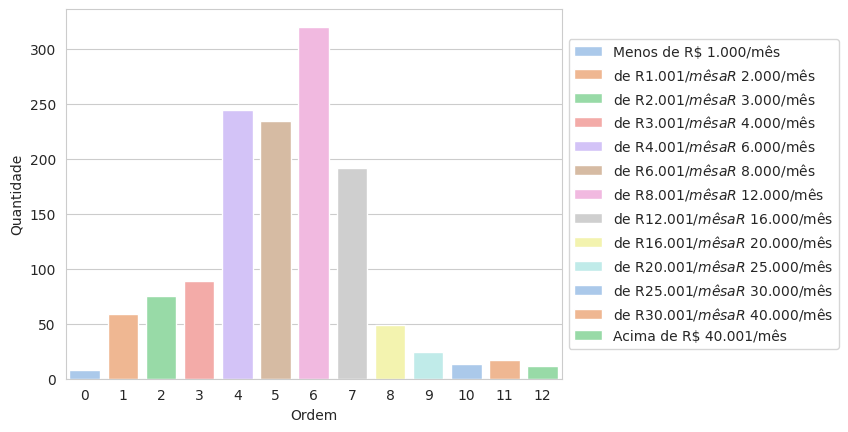

In [34]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_agg, x='Ordem', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

2. Por Salário e Cargo

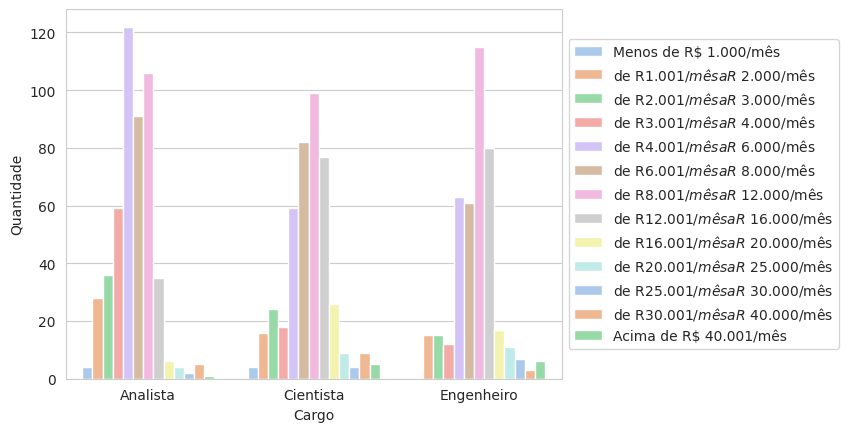

In [35]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_cargo_agg, x='Cargo', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

3. Por Salário, Cargo e Experiência



*   Analista



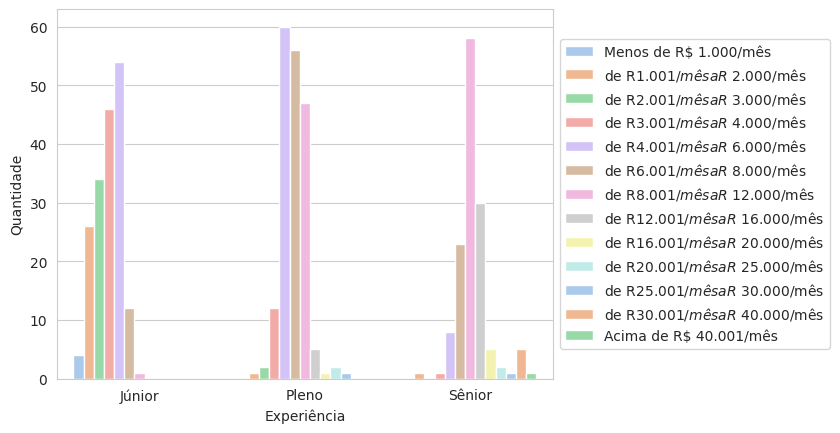

In [36]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Analista']
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))



*   Cientista



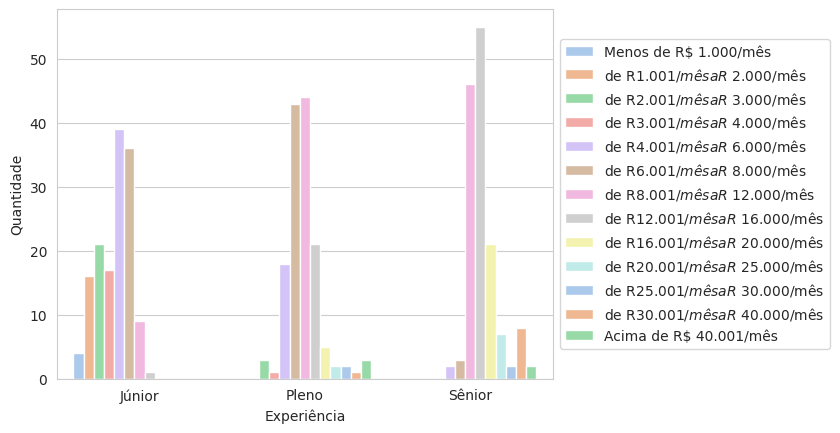

In [37]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Cientista']
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))



*   Engenheiro


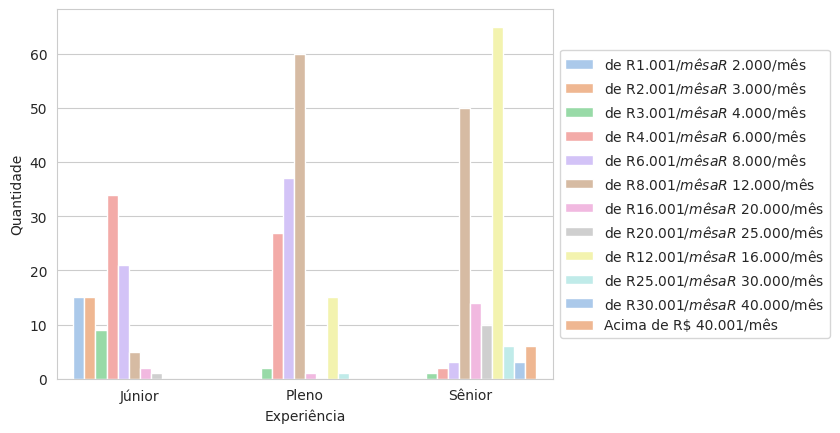

In [38]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Engenheiro']
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Resultado

Após a análise dos salários, cargos e experiência, os resultados revelam o seguinte:


**Para o cargo de Analista:**

Para profissionais no nível Júnior, a média de salário varia entre R$ 4001 e R$6000.
Para profissionais no nível Pleno, a média de salário também fica entre R$4001 e R$6000.
Já para profissionais no nível Sênior, a média de salário varia de R$8001 a R$12000.

**Para o cargo de Cientista:**

Para os profissionais no nível Júnior, a média de salário situa-se entre R$4001 e R$6000.
No nível Pleno, a média de salário varia de R$8001 a R$12000.
Enquanto que para os profissionais Sênior, a média de salário oscila entre R$12000 e R$16000.

**Para o cargo de Engenheiro:**

No nível Júnior, a média de salário está entre R$4001 e R$6000.
Para os profissionais Plenos, a média de salário varia de R$8001 a R$12000.
E para os profissionais Sênior, a média de salário situa-se entre R$12001 e R$16000.

Esses resultados representam os intervalos médios de salários para cada categoria de cargo dentro de suas respectivas áreas de atuação.